17 de abril 2024.

Nancy Woolrich Sorroza

# A07 - Repaso Módulo 2
---

## Cifrado

Se recibió un mensaje cifrado con un método congruencial simple: $ x_n = (ax_{n-1}+b)\mod m $.

El cifrado que se usó es el siguiente:
- 0 corresponde a 'A'
- 1 corresponde a 'B'
- 2 corresponde a 'C'
- ...
- 25 corresponde a 'Z' (no hay 'Ñ')
- Se toma la letra y se le suma un número aleatorio desconocido.
- Se generan 3 números antes de empezar el cifrado; esto quiere decir que la primera letra es "Letra + $x_3$"
- El mensaje que llegó fue: "15, 25, 21, 5"

Sabiendo de antemano que los parámetros de este generador son $m=16$, $a=5$, $b=3$ y que la semilla fue $7$; ¿cuál es el mensaje decodificado?

In [41]:
m=16
a=5
b=3
x0=7 #Semilla

x1=(a*x0+b)%m
x2=(a*x1+b)%m
x3=(a*x2+b)%m
x4=(a*x3+b)%m
x5=(a*x4+b)%m
x6=(a*x5+b)%m

In [42]:
x3, x4, x5, x6

(8, 11, 10, 5)

In [43]:
letra1=15-8
letra2=25-11 
letra3=21-10
letra4=5-5

In [44]:
letra1, letra2, letra3, letra4

(7, 14, 11, 0)


## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [46]:
import numpy as np
import pandas as pd

In [47]:
def montecarlo(f,a,b,N):
    u=np.random.uniform(a,b,N)
    y=f(u)
    return np.mean(y)*(b-a)


Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [48]:
#Definimos las fuciones que vamos a utilizar

def f1(x):
    return np.sqrt(1+x**4)

def f2(x):
    return np.log(np.log(x))

def f3(x):
    return 1/np.log(x)

def f4(x):
    return np.exp((-x**2)/2)


In [49]:
a=4
b=5
N=[10, 100, 1000, 10000, 100000]
tablat=pd.DataFrame(columns=["Aproximación_f1", "Aproximación_f2", "Aproximación_f3", "Aproximación_f4"], index=N)

for n in N: 
    tablat.loc[n,"Aproximación_f1"]= montecarlo(f1,a,b,n)
    tablat.loc[n,"Aproximación_f2"]= montecarlo(f2,a,b,n)
    tablat.loc[n,"Aproximación_f3"]= montecarlo(f3,a,b,n)
    tablat.loc[n,"Aproximación_f4"]= montecarlo(f4,a,b,n)
tablat

,Aproximación_f1,Aproximación_f2,Aproximación_f3,Aproximación_f4
10,20.722943,0.411957,0.671786,0.000069
100,20.393047,0.403283,0.667604,0.000091
1000,20.252861,0.404436,0.667609,0.000077
10000,20.397039,0.406417,0.667302,0.000078
100000,20.366409,0.406014,0.666985,0.000078


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#Definimos la función Montecarlo
def montecarlo2(region, ax, bx, ay, by, N):
    X=np.random.uniform(ax, bx, N)
    Y=np.random.uniform(ay, by, N)
    return np.mean(region(X,Y)) * ((by-ay)*(bx-ax))

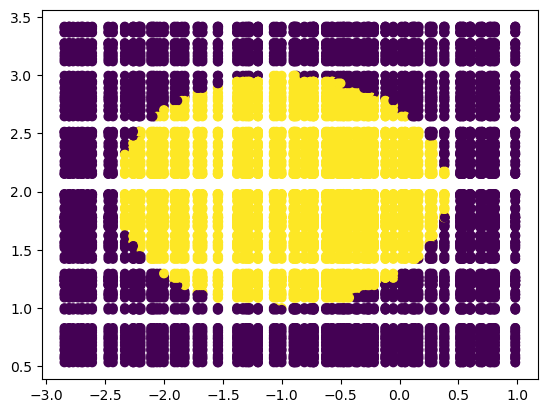

In [57]:
#Definimos la región que indica el problema
def region(x,y):
    return (x**2 )+ (2*y**2) <= -(2*x) + (8*y) - 7

#Empezamos a checar valores que sean buenos para la región
N=100

ax=-3
bx=1

ay=0.5
by=3.5

X=np.random.uniform(ax, bx, N)
Y=np.random.uniform(ay, by, N)
X, Y=np.meshgrid(X, Y)
plt.scatter(X, Y, c=region(X, Y))

In [59]:
    
#Hacemos una tabla en pandas con los datos obtenidos
import pandas as pd

N=[10, 100, 1000, 10000, 100000]
ax=-3
bx=1

ay=0.5
by=3.5

tabla=pd.DataFrame(columns=["Aproximación"], index=N)
for n in N: 
    #Error relativo
    AD = montecarlo2(region, ax, bx, ay, by, n)
    AR = (bx - ax)*(by - ay)
    Crel = np.sqrt( (1 - AD/AR) / (AD/AR) )
    e_rel = np.log(Crel) - np.log(n)/2
    tabla.loc[n,"Aproximación"]= montecarlo2(region, ax, bx, ay, by, n)
    tabla.loc[n,"Error"]= e_rel
    
tabla

,Aproximación,Error
10,1.2,-0.948560
100,3.72,-1.993065
1000,4.464,-3.183474
10000,4.5,-4.352103
100000,4.44696,-5.484296


---
## Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [1]:
import pandas as pd
import numpy as np

In [2]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [63]:
decisiones=["tallo", "follaje", "izq", "der"]
probabilidad=[0.1, 0.2, 0.3, 0.4]

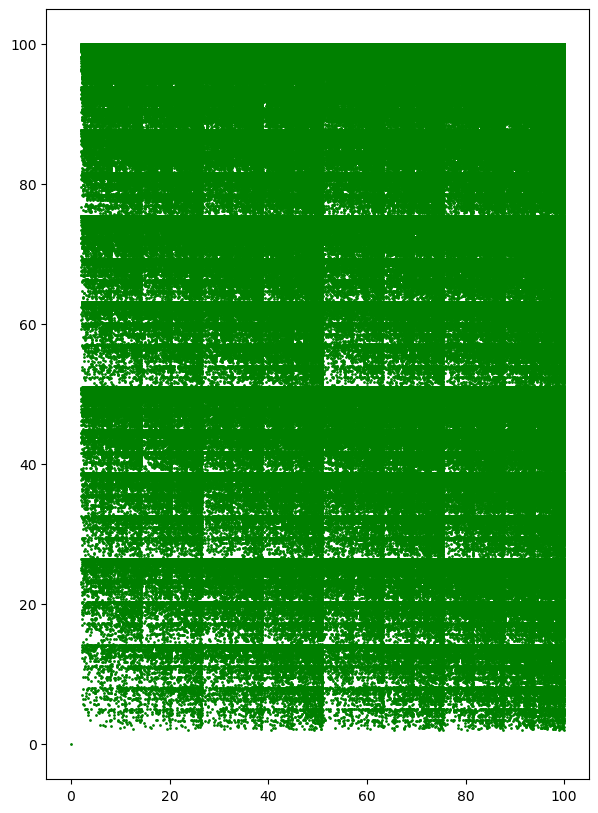

In [68]:
#opción 1
x=[0]
y=[0]

for k in range(10**6):
    decision=np.random.choice(decisiones,p=probabilidad)
    if decision=="tallo":
        a, b, c, d, e, f = 0.5, 0, 0, 0.5, 1, 1
    elif decision=="follaje":
        a, b, c, d, e, f = 0.5, 0, 0, 0.5, 50, 1
    elif decision=="izq":
        a, b, c, d, e, f = 0.5, 0, 0, 0.5, 1, 50
    else :
        a, b, c, d, e, f = 0.5, 0, 0, 0.5, 50, 50,
    
    
    xkp1 = a*x[-1] + b*y[-1] + e
    ykp1 = c*x[-1] + d*y[-1] + f
    
    x.append(xkp1)
    y.append(ykp1)
    
plt.figure(figsize=(7, 10))
plt.scatter(x, y, s=1, c="g")

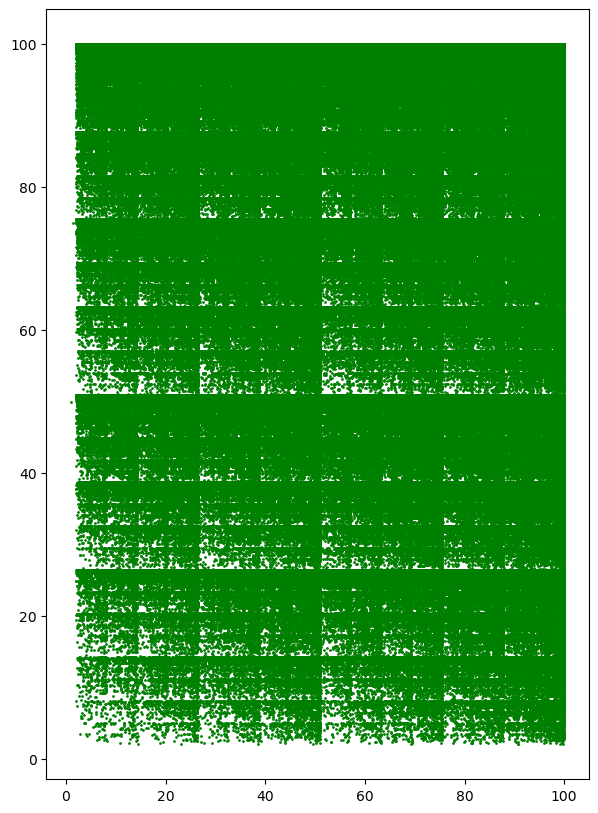

In [69]:
#opción 2
x=np.array([0,0])
x_historial=[]

for k in range(10**6):
    decision=np.random.choice(decisiones,p=probabilidad)
    if decision=="tallo":
        A=np.array([[0.5, 0],
                    [0, 0.5]])
        b=np.array([1, 1])
    elif decision=="follaje":
        A=np.array([[0.5, 0],
                    [0, 0.5]])
        b=np.array([50, 1])
    elif decision=="izq":
        A=np.array([[0.5, 0],
                    [0, 0.5]])
        b=np.array([1, 50])
    else :
        A=np.array([[0.5, 0],
                    [0, 0.5]])
        b=np.array([50, 50])
    
     
    x=A @ x + b
    
    x_historial.append(x)
    
X=np.array(x_historial)
x=X[:,0]
y=X[:,1]

plt.figure(figsize=(7, 10))
plt.scatter(x, y, s=1, c="g")

---
## Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def getClose(names, start, end):
    return yf.download(names, start=start, end=end)[["Adj Close"]]

def simR(media, std, start, dias, N): #media, estandar, cantidad de días, cantidad de simulaciones
    sim_R = np.random.normal(media, std, size=(dias, N)) +1
    fechas = pd.date_range(start, periods=dias)
    return pd.DataFrame(sim_R, index=fechas)

[*********************100%%**********************]  1 of 1 completed


<Axes: ylabel='Frequency'>

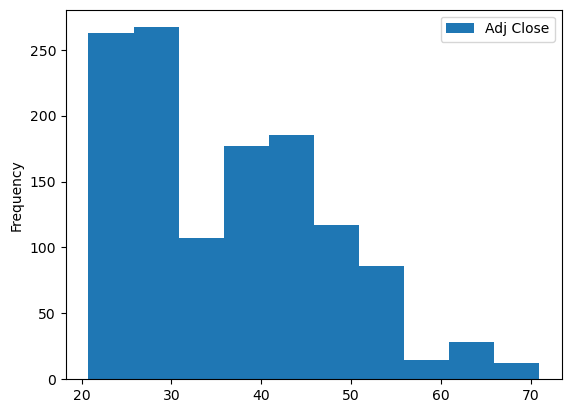

In [9]:
aapl = getClose("AAPL", "2015-01-01", "2019-12-31")
aapl.plot.hist()

[*********************100%%**********************]  1 of 1 completed


<Axes: ylabel='Frequency'>

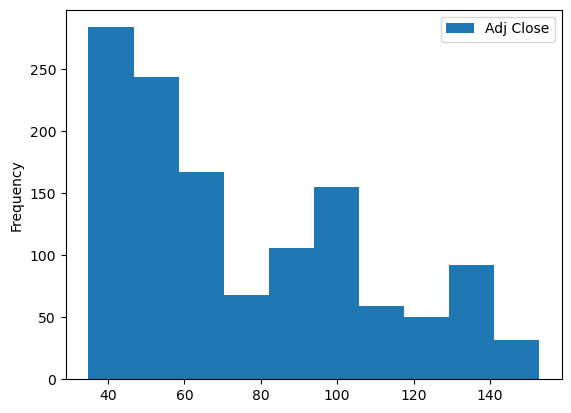

In [12]:
msft = getClose("MSFT", "2015-01-01", "2019-12-31")
msft.plot.hist()

Calcule los rendimientos diarios junto con sus características estadísticas

<Axes: ylabel='Frequency'>

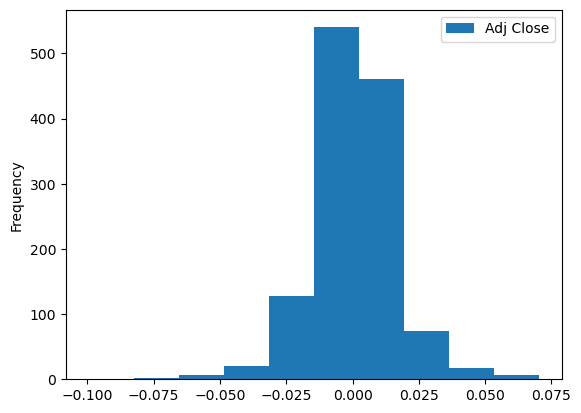

In [10]:
R_aapl = aapl.pct_change()
R_aapl.plot.hist()

In [13]:
R_aapl.describe

<bound method NDFrame.describe of             Adj Close
Date                 
2015-01-02        NaN
2015-01-05  -0.028171
2015-01-06   0.000094
2015-01-07   0.014022
2015-01-08   0.038422
...               ...
2019-12-23   0.016318
2019-12-24   0.000950
2019-12-26   0.019841
2019-12-27  -0.000379
2019-12-30   0.005935

[1257 rows x 1 columns]>

In [20]:
R_aapl.mean()

Adj Close    0.000971
dtype: float64

In [21]:
R_aapl.std()

Adj Close    0.015651
dtype: float64

(array([ 49., 288., 548., 192.,  23.]),
 array([-0.04786579, -0.02749185, -0.00711791,  0.01325604,  0.03362998,
         0.05400392]),
 <BarContainer object of 5 artists>)

<Figure size 640x480 with 0 Axes>

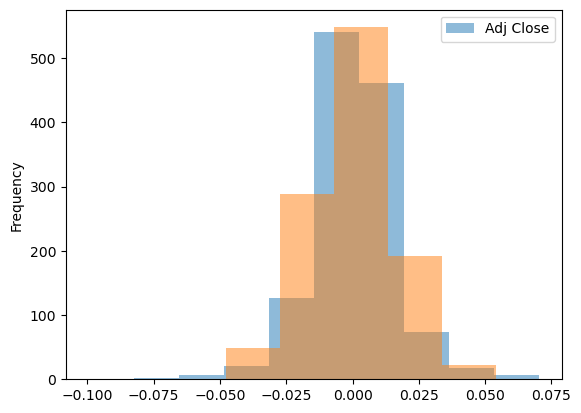

In [30]:
import numpy as np
sim_R_aapl=np.random.normal(R_aapl.mean(), R_aapl.std(), 1100) #Dist normal aleatoria y extrae 252 muestras

plt.figure()
R_aapl.plot.hist(alpha=0.5)
plt.hist(sim_R_aapl, alpha=0.5, bins=5)

<Axes: ylabel='Frequency'>

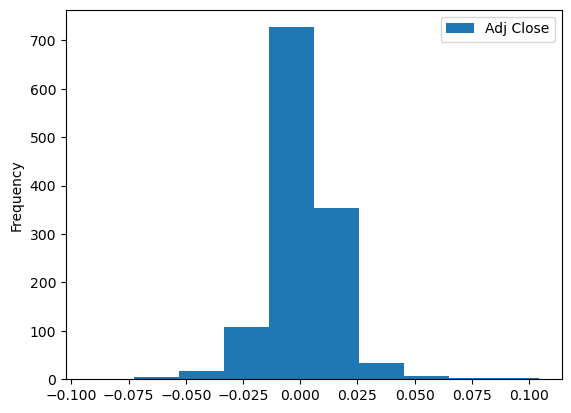

In [31]:
R_msft = msft.pct_change()
R_msft.plot.hist()

In [32]:
R_msft.describe

<bound method NDFrame.describe of             Adj Close
Date                 
2015-01-02        NaN
2015-01-05  -0.009196
2015-01-06  -0.014677
2015-01-07   0.012705
2015-01-08   0.029418
...               ...
2019-12-23   0.000000
2019-12-24  -0.000191
2019-12-26   0.008197
2019-12-27   0.001828
2019-12-30  -0.008619

[1257 rows x 1 columns]>

In [33]:
R_msft.mean()

Adj Close    0.001161
dtype: float64

In [34]:
R_msft.std()

Adj Close    0.014692
dtype: float64

(array([ 31., 229., 486., 288.,  66.]),
 array([-0.04125925, -0.02506899, -0.00887873,  0.00731153,  0.02350179,
         0.03969204]),
 <BarContainer object of 5 artists>)

<Figure size 640x480 with 0 Axes>

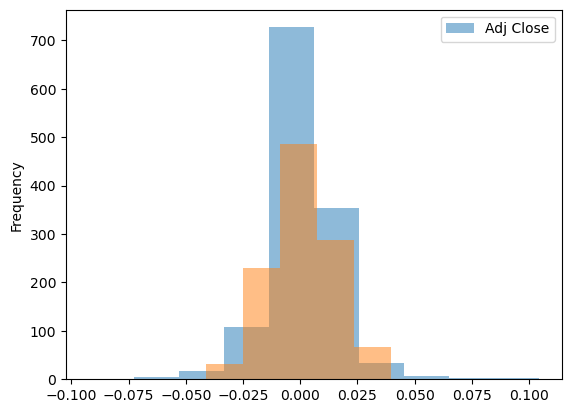

In [36]:
import numpy as np
sim_R_msft=np.random.normal(R_msft.mean(), R_msft.std(), 1100) #Dist normal aleatoria y extrae 252 muestras

plt.figure()
R_msft.plot.hist(alpha=0.5)
plt.hist(sim_R_msft, alpha=0.5, bins=5)

Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [39]:
sim_R_aapl= simR(R_aapl.mean(), R_aapl.std(), "2020-01-01", 365, 1000)
sim_R_aapl.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,0.976737,1.022876,1.032561,1.004793,0.991064,1.011290,0.974693,1.006733,1.018312,0.992194,...,1.007615,0.998138,1.002641,1.007677,1.003040,0.999674,1.010982,1.008051,0.991976,0.989105
2020-01-02,1.002957,0.983292,0.979911,1.005189,0.981231,1.024338,1.009425,1.011635,0.988605,0.996845,...,0.997258,0.991019,0.999759,1.009270,0.968831,1.022392,0.981908,1.016969,0.969944,1.000671
2020-01-03,1.000069,0.998667,0.993122,1.009258,0.981849,1.007489,0.996870,1.001687,1.012498,0.971127,...,1.019988,1.015195,1.017731,0.984970,1.003226,0.972234,1.014435,0.998967,0.998735,1.015421


In [40]:
sim_R_msft= simR(R_msft.mean(), R_msft.std(), "2020-01-01", 365, 1000)
sim_R_msft.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,1.003843,1.017299,1.014438,0.994971,1.015655,1.017001,0.998201,0.981326,1.006263,1.000453,...,0.984618,1.001476,0.996814,1.008286,1.011057,0.998908,1.002213,1.008268,1.017255,1.007089
2020-01-02,0.964501,1.017070,0.978071,0.981995,1.008775,0.989732,1.005275,0.997068,1.006325,1.006838,...,1.002608,1.010192,1.016481,0.983674,1.024596,1.017260,1.008362,1.001694,0.972696,0.998942
2020-01-03,1.005420,1.015533,0.965918,0.978469,1.009452,1.003285,1.012620,0.980501,1.008771,1.006639,...,1.007555,0.979586,1.003259,1.011100,0.997836,1.002739,0.995753,1.002949,1.011783,1.000320


Calcule los precios con base en los rendimientos simulados

In [41]:
aapl.iloc[-1]

Adj Close    70.911545
Name: 2019-12-30 00:00:00, dtype: float64

In [42]:
precios_simulados_aapl = sim_R_aapl.cumprod()*70.911545
precios_simulados_aapl.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-12-26,102.641359,100.392351,95.104304,95.906304,165.968387,96.209687,110.698725,134.757942,108.055208,107.547830,...,95.976981,75.551740,108.911381,95.760416,60.647536,119.543861,113.243345,83.299611,87.365935,99.205550
2020-12-27,101.815097,101.457763,98.343229,95.400071,167.219343,94.655852,109.886579,138.587831,109.751639,106.861667,...,97.144502,75.370341,106.323833,95.827764,62.040000,119.178096,112.779710,82.660095,86.730810,97.041213
2020-12-28,104.223337,100.893337,98.201282,95.081785,162.999221,92.497820,111.492103,139.106732,109.073233,109.764214,...,97.503210,74.164981,106.944091,97.859303,61.145475,120.967059,108.186684,82.813137,88.794683,96.188135
2020-12-29,106.044033,99.802638,97.575899,97.386958,170.657388,92.748376,110.158473,139.072290,110.548013,110.628463,...,99.129257,73.095900,109.436355,96.028999,61.700295,123.171865,109.918935,83.346239,87.989379,96.183925
2020-12-30,104.498570,97.438561,98.236712,100.208414,170.364836,92.221795,109.962959,139.555807,107.197163,112.067417,...,99.483185,73.090503,111.462909,96.464536,60.002146,121.506200,112.221044,83.722673,86.691267,94.600791


In [44]:
precios_simulados_aapl.mean(axis=1)

2020-01-01     70.924800
2020-01-02     70.981543
2020-01-03     71.049737
2020-01-04     71.068841
2020-01-05     71.187606
                 ...    
2020-12-26     99.867093
2020-12-27     99.998828
2020-12-28    100.143180
2020-12-29    100.199795
2020-12-30    100.220699
Freq: D, Length: 365, dtype: float64

In [45]:
msft.iloc[-1]

Adj Close    151.579407
Name: 2019-12-30 00:00:00, dtype: float64

In [46]:
precios_simulados_msft = sim_R_msft.cumprod()*151.579407
precios_simulados_msft.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-12-26,173.897805,278.917686,241.881728,257.633222,211.295754,151.083483,165.352540,259.398342,311.999351,170.929884,...,277.713007,223.702755,187.425769,172.037104,355.417171,361.490988,304.556341,216.432710,190.664486,201.469248
2020-12-27,179.052550,274.766010,246.672383,257.102052,214.183791,148.348755,167.259445,255.595258,310.632261,173.074008,...,275.660342,222.111755,189.189624,169.195508,356.855802,358.881877,308.526732,221.329942,191.007253,200.098955
2020-12-28,176.848326,275.408740,251.717043,255.440229,212.330211,145.264499,165.632441,253.824550,310.590080,177.155821,...,281.593066,222.917438,194.391266,166.703663,360.182693,355.767044,312.579205,222.782796,184.898641,199.189833
2020-12-29,175.171907,276.431932,251.931021,257.408002,207.430960,145.197931,162.524293,254.788716,306.688286,177.142723,...,288.017361,218.460307,194.118616,169.511737,358.977923,354.000325,316.793008,219.138993,184.909755,197.892114
2020-12-30,177.800762,276.215952,251.043913,259.529051,207.130362,148.348579,163.386117,258.112630,309.046236,178.018739,...,287.015855,214.246731,196.058828,174.943767,358.720258,356.955464,313.838260,216.841855,181.826234,194.797513


In [47]:
precios_simulados_msft.mean(axis=1)

2020-01-01    151.787233
2020-01-02    151.991724
2020-01-03    152.200226
2020-01-04    152.395469
2020-01-05    152.601836
                 ...    
2020-12-26    231.846934
2020-12-27    232.169309
2020-12-28    232.669993
2020-12-29    233.023638
2020-12-30    233.455564
Freq: D, Length: 365, dtype: float64

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [48]:
sim_R_aapl= simR(R_aapl.mean(), R_aapl.std(), "2020-01-01", 365, 10000)
(sim_R_aapl.cumprod()*151.579407 > 151.579407*1.20).mean(axis=1)

2020-01-01    0.0000
2020-01-02    0.0000
2020-01-03    0.0000
2020-01-04    0.0000
2020-01-05    0.0000
               ...  
2020-12-26    0.6674
2020-12-27    0.6668
2020-12-28    0.6699
2020-12-29    0.6701
2020-12-30    0.6689
Freq: D, Length: 365, dtype: float64

In [49]:
sim_R_msft= simR(R_msft.mean(), R_msft.std(), "2020-01-01", 365, 10000)
(sim_R_msft.cumprod()*70.911545 > 70.911545*1.20).mean(axis=1)

2020-01-01    0.0000
2020-01-02    0.0000
2020-01-03    0.0000
2020-01-04    0.0000
2020-01-05    0.0000
               ...  
2020-12-26    0.7617
2020-12-27    0.7618
2020-12-28    0.7631
2020-12-29    0.7631
2020-12-30    0.7633
Freq: D, Length: 365, dtype: float64

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

[*********************100%%**********************]  1 of 1 completed


<Axes: ylabel='Frequency'>

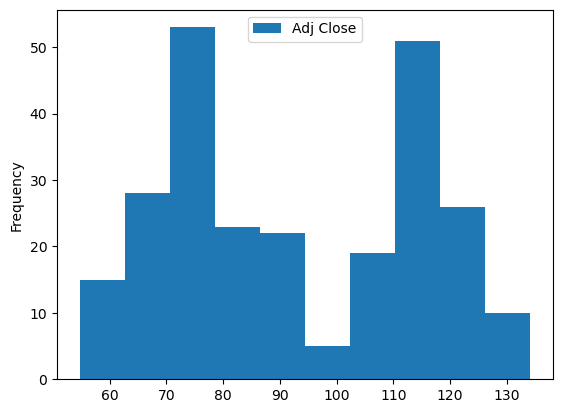

In [50]:
aapl=getClose("AAPL", "2020-01-01", "2020-12-31")
aapl.plot.hist()

<Axes: ylabel='Frequency'>

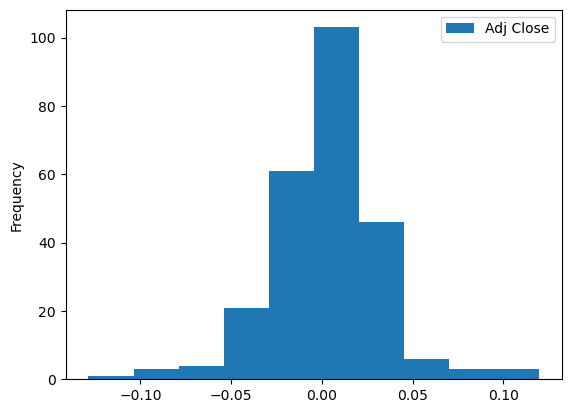

In [52]:
R_aapl = aapl.pct_change()
R_aapl.plot.hist()

In [53]:
R_aapl.describe

<bound method NDFrame.describe of             Adj Close
Date                 
2020-01-02        NaN
2020-01-03  -0.009722
2020-01-06   0.007968
2020-01-07  -0.004703
2020-01-08   0.016086
...               ...
2020-12-23  -0.006976
2020-12-24   0.007712
2020-12-28   0.035766
2020-12-29  -0.013315
2020-12-30  -0.008527

[252 rows x 1 columns]>

[*********************100%%**********************]  1 of 1 completed


<Axes: ylabel='Frequency'>

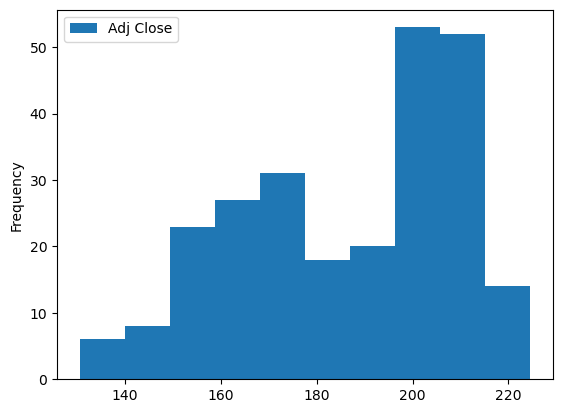

In [54]:
msft=getClose("MSFT", "2020-01-01", "2020-12-31")
msft.plot.hist()

<Axes: ylabel='Frequency'>

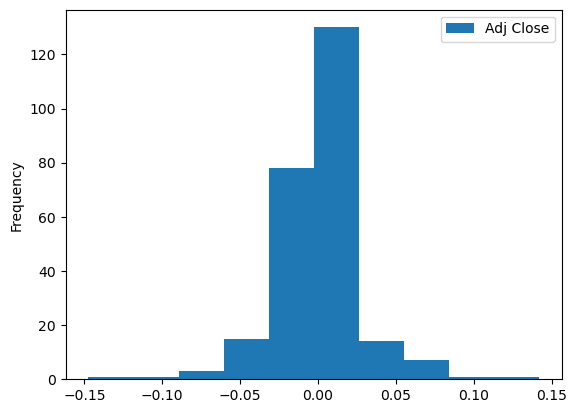

In [55]:
R_msft = msft.pct_change()
R_msft.plot.hist()

In [56]:
R_msft.describe

<bound method NDFrame.describe of             Adj Close
Date                 
2020-01-02        NaN
2020-01-03  -0.012452
2020-01-06   0.002585
2020-01-07  -0.009118
2020-01-08   0.015928
...               ...
2020-12-23  -0.013039
2020-12-24   0.007827
2020-12-28   0.009922
2020-12-29  -0.003601
2020-12-30  -0.011019

[252 rows x 1 columns]>

## Probabilidad

Imagina que en un país la estatura promedio es 164 centímetros, con una desviación estándar de 4 centímetros. ¿Cuál es la probabilidad de que si sumamos la estatura de 20 personas se obtenga un valor mayor a 30 metros?

In [32]:
import pandas as pd
import numpy as np
(pd.DataFrame(np.random.normal(164, 4, (20, 10000))).sum() > 3000).mean()

1.0

El 100%